In [2]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
# text in Western (Windows 1252)

import pickle
import numpy as np
from keras import optimizers
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.models import load_model
# from keras import backend as Input
np.random.seed(7)

Using Theano backend.


In [3]:
import sys
#sys.path.insert(0, '../../')
sys.path.insert(0, '/home/luka/Developement/accetuation/')
from prepare_data import *

%run ../../prepare_data.py

In [6]:
data = Data('sl', reverse_inputs=False)
data.generate_data('syllables_word_accetuation_correct_input_order_train',
                   'syllables_word_accetuation_correct_input_order_test',
                   'syllables_word_accetuation_correct_input_order_validate', content_name='SlovarIJS_BESEDE_utf8.lex',
                      content_shuffle_vector='content_shuffle_vector', shuffle_vector='shuffle_vector',
                      inputs_location='../internal_representations/inputs/', content_location='../../data/')

LOADING DATA...
LOAD SUCCESSFUL!


In [16]:
data = Data('sl')
data.generate_data('syllables_word_accetuation_train',
                   'syllables_word_accetuation_test',
                   'syllables_word_accetuation_validate', content_name='SlovarIJS_BESEDE_utf8.lex',
                      content_shuffle_vector='content_shuffle_vector', shuffle_vector='shuffle_vector',
                      inputs_location='../internal_representations/inputs/', content_location='../../data/')

LOADING DATA...
LOAD SUCCESSFUL!


In [4]:
data = Data('s', reverse_inputs=False)
data.generate_data('syllables_word_accetuation_correct_input_order_train',
                   'syllables_word_accetuation_correct_input_order_test',
                   'syllables_word_accetuation_correct_input_order_validate', content_name='SlovarIJS_BESEDE_utf8.lex',
                      content_shuffle_vector='content_shuffle_vector', shuffle_vector='shuffle_vector',
                      inputs_location='../internal_representations/inputs/', content_location='../../data/')

LOADING DATA...
LOAD SUCCESSFUL!


In [28]:
data = Data('s')
data.generate_data('syllables_word_accetuation_train',
                   'syllables_word_accetuation_test',
                   'syllables_word_accetuation_validate', content_name='SlovarIJS_BESEDE_utf8.lex',
                      content_shuffle_vector='content_shuffle_vector', shuffle_vector='shuffle_vector',
                      inputs_location='../internal_representations/inputs/', content_location='../../data/')

LOADING DATA...
LOAD SUCCESSFUL!


In [3]:
data = Data('l', reverse_inputs=False)
data.generate_data('letters_word_accetuation_correct_input_order_train',
                   'letters_word_accetuation_correct_input_order_test',
                   'letters_word_accetuation_correct_input_order_validate', content_name='SlovarIJS_BESEDE_utf8.lex',
                      content_shuffle_vector='content_shuffle_vector', shuffle_vector='shuffle_vector',
                      inputs_location='../internal_representations/inputs/', content_location='../../data/')

LOADING DATA...
LOAD SUCCESSFUL!


In [52]:
data = Data('l')
data.generate_data('letters_word_accetuation_train',
                   'letters_word_accetuation_test',
                   'letters_word_accetuation_validate', content_name='SlovarIJS_BESEDE_utf8.lex',
                      content_shuffle_vector='content_shuffle_vector', shuffle_vector='shuffle_vector',
                      inputs_location='../internal_representations/inputs/', content_location='../../data/')

LOADING DATA...
LOAD SUCCESSFUL!


In [5]:
#data.x_train = None
content = data._read_content('../../data/SlovarIJS_BESEDE_utf8.lex')
dictionary, max_word, max_num_vowels, vowels, accented_vowels = data._create_dict(content)
feature_dictionary = data._create_feature_dictionary()
syllable_dictionary = data._create_syllables_dictionary(content, vowels)

In [6]:
len(syllable_dictionary)

5168

In [5]:
data.x_train = np.concatenate((data.x_train, data.x_test), axis=0)
data.x_other_features_train = np.concatenate((data.x_other_features_train, data.x_other_features_test), axis=0)
data.y_train = np.concatenate((data.y_train, data.y_test), axis=0)

In [9]:
nn_output_dim = 10
nn_hdim = 516
batch_size = 16
# actual_epoch = 1
actual_epoch = 20
# num_fake_epoch = 2
num_fake_epoch = 20



# letters
# conv_input_shape=(23, 36)

# syllabled letters
conv_input_shape=(10, 252)


othr_input = (140, )

conv_input = Input(shape=conv_input_shape, name='conv_input')
# letters
# x_conv = Conv1D(115, (3), padding='same', activation='relu')(conv_input)
# x_conv = Conv1D(46, (3), padding='same', activation='relu')(x_conv)

# syllabled letters
x_conv = Conv1D(200, (2), padding='same', activation='relu')(conv_input)
x_conv = MaxPooling1D(pool_size=2)(x_conv)
x_conv = Flatten()(x_conv)

othr_input = Input(shape=othr_input, name='othr_input')

x = concatenate([x_conv, othr_input])
# x = Dense(1024, input_dim=(516 + 256), activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(nn_output_dim, activation='sigmoid')(x)




model = Model(inputs=[conv_input, othr_input], outputs=x)
opt = optimizers.Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[actual_accuracy,])

In [10]:
model.load_weights('syllabled_letters/v3_2/20_epoch.h5')
#model = load_model('syllabled_letters/v2_5_3/40_epoch.h5', custom_objects={'actual_accuracy': actual_accuracy})

In [43]:
nn_output_dim = 10
nn_hdim = 516
batch_size = 16
# actual_epoch = 1
actual_epoch = 20
# num_fake_epoch = 2
num_fake_epoch = 20



# letters
# conv_input_shape=(23, 36)

# syllabled letters
conv_input_shape=(10, 5168)


othr_input = (140, )

conv_input = Input(shape=conv_input_shape, name='conv_input')
# letters
# x_conv = Conv1D(115, (3), padding='same', activation='relu')(conv_input)
# x_conv = Conv1D(46, (3), padding='same', activation='relu')(x_conv)

# syllabled letters
x_conv = Conv1D(200, (2), padding='same', activation='relu')(conv_input)
x_conv = MaxPooling1D(pool_size=2)(x_conv)
x_conv = Flatten()(x_conv)

othr_input = Input(shape=othr_input, name='othr_input')

x = concatenate([x_conv, othr_input])
# x = Dense(1024, input_dim=(516 + 256), activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(nn_output_dim, activation='sigmoid')(x)




model = Model(inputs=[conv_input, othr_input], outputs=x)
opt = optimizers.Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[actual_accuracy,])

In [44]:
model.load_weights('syllables/v3_2/20_epoch.h5')

In [5]:
nn_output_dim = 10
nn_hdim = 516
batch_size = 16
# actual_epoch = 1
actual_epoch = 20
# num_fake_epoch = 2
num_fake_epoch = 20




conv_input_shape=(23, 36)
othr_input = (140, )

conv_input = Input(shape=conv_input_shape, name='conv_input')
x_conv = Conv1D(115, (3), padding='same', activation='relu')(conv_input)
x_conv = Conv1D(46, (3), padding='same', activation='relu')(x_conv)
x_conv = MaxPooling1D(pool_size=2)(x_conv)
x_conv = Flatten()(x_conv)


othr_input = Input(shape=othr_input, name='othr_input')

x = concatenate([x_conv, othr_input])
# x = Dense(1024, input_dim=(516 + 256), activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(nn_output_dim, activation='sigmoid')(x)




model = Model(inputs=[conv_input, othr_input], outputs=x)
opt = optimizers.Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[actual_accuracy,])

In [6]:
model.load_weights('cnn_dictionary/v5_2/20_epoch.h5')

In [7]:
scores = model.evaluate_generator(data.generator('test', batch_size, content_name='SlovarIJS_BESEDE_utf8.lex', content_location='../../data/'), 
                            data.x_test.shape[0]/(batch_size))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


actual_accuracy: 99.83%


In [11]:
predictions = model.predict_generator(data.generator('test', batch_size, content_name='SlovarIJS_BESEDE_utf8.lex', content_location='../../data/'), 
                                      data.x_test.shape[0]/(batch_size))

In [13]:
accuracy, errors = data.test_accuracy(predictions, data.x_test, data.x_other_features_test, data.y_test, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary)
print(accuracy)

88.73564101579008


In [14]:
new_predictions = data.reverse_predictions(predictions, data.x_test)

In [17]:
accuracy, errors = data.test_accuracy(new_predictions, data.x_test, data.x_other_features_test, data.y_test, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary)
print(accuracy)

88.73564101579008


In [8]:
# PREDICT TEST DATA!!!
predictions = model.predict_generator(data.generator('validate', batch_size, content_name='SlovarIJS_BESEDE_utf8.lex', content_location='../../data/'), 
                                      data.x_validate.shape[0]/(batch_size))

In [58]:
accuracy

88.73564101579008

In [76]:
accuracy, errors = data.test_accuracy(new_predictions, data.x_validate, data.x_other_features_validate, data.y_validate, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary)
print(accuracy)

86.9573235955885


In [60]:
def get_word_length(x_el):
    i = 0
    for el in x_el:
        if el == 0:
            return i
        i += 1

new_predictions = np.zeros(predictions.shape, dtype='float32')
for i in range(len(predictions)):
    word_len = get_word_length(data.x_test[i])
    #print(word_len)
    #if word_len > 6:
    #    print(word_len)
    #    print(data.y_test[i])
    
    #
    for k in range(word_len):
        new_predictions[i][k] += predictions[i][word_len - 1 - k]

        
accuracy, errors = data.test_accuracy(new_predictions, data.x_test, data.x_other_features_test, data.y_test, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary)
print(accuracy)
        
errors = [[el[0], el[1][::-1], el[2], el[3][::-1], el[4][::-1]] for el in errors]


errors.sort(key=lambda x: x[1])
# name = 'error_analysis_results/bidirectional_input/letters_word_accetuation'
# name = 'error_analysis_results/bidirectional_input/letters_word_accetuation_test'
# name = 'error_analysis_results/bidirectional_input/syllables_word_accetuation'
# name = 'error_analysis_results/bidirectional_input/syllables_word_accetuation_test'
# name = 'error_analysis_results/bidirectional_input/syllabled_letters_word_accetuation'
#name = 'error_analysis_results/bidirectional_input/syllabled_letters_word_accetuation_test'
# name = 'error_analysis_results/onedirectional_input/letters_word_accetuation_correct_order_reversed_test'
# name = 'error_analysis_results/onedirectional_input/syllabled_letters_word_accetuation_correct_order_reversed_test'
# name = 'error_analysis_results/onedirectional_input/syllables_word_accetuation_correct_order_reversed_test'
# name = 'error_analysis_results/onedirectional_input/letters_word_accetuation_correct_order_reversed'
# name = 'error_analysis_results/onedirectional_input/syllabled_letters_word_accetuation_correct_order_reversed'
# name = 'error_analysis_results/onedirectional_input/syllables_word_accetuation_correct_order_reversed'
output = open(name + '_error.pkl', 'wb')
pickle.dump(errors, output)
output.close()
output = open(name + '_predictions.pkl', 'wb')
pickle.dump(new_predictions, output)
output.close()

88.73564101579008


In [ ]:
def get_word_length(x_el):
    i = 0
    for el in x_el:
        if el == 0:
            return i
        i += 1

def reverse_predictions(predictions, x_syl):
    new_predictions = np.zeros(predictions.shape, dtype='float32')
    for i in range(len(predictions)):
        word_len = get_word_length(data.x_test[i])

        for k in range(word_len):
            new_predictions[i][k] += predictions[i][word_len - 1 - k]


    return new_predictions



In [8]:
# VALIDATION DATA
#pickle_input = open('letters_word_accetuation_test_error.pkl', 'rb')
#letters_word_accetuation_test = pickle.load(pickle_input)
#pickle_input = open('syllables_word_accetuation_test_error.pkl', 'rb')
#syllables_word_accetuation_test = pickle.load(pickle_input)
#pickle_input = open('syllabled_letters_word_accetuation_test_error.pkl', 'rb')
#syllabled_letters_word_accetuation_test = pickle.load(pickle_input)
#pickle_input = open('ensemble_test_errors.pkl', 'rb')
#ensemble_word_accetuation_test = pickle.load(pickle_input)

pickle_input = open('letters_word_accetuation_predictions.pkl', 'rb')
letters_word_accetuation_predictions = pickle.load(pickle_input)
pickle_input = open('syllables_word_accetuation_predictions.pkl', 'rb')
syllables_word_accetuation_predictions = pickle.load(pickle_input)
pickle_input = open('syllabled_letters_word_accetuation_predictions.pkl', 'rb')
syllabled_letters_word_accetuation_predictions = pickle.load(pickle_input)


pickle_input = open('error_analysis_results/onedirectional_input/letters_word_accetuation_correct_order_reversed_predictions.pkl', 'rb')
letters_word_accetuation_correct_order_predictions = pickle.load(pickle_input)
pickle_input = open('error_analysis_results/onedirectional_input/syllabled_letters_word_accetuation_correct_order_reversed_predictions.pkl', 'rb')
syllables_word_accetuation_correct_order_predictions = pickle.load(pickle_input)
pickle_input = open('error_analysis_results/onedirectional_input/syllables_word_accetuation_correct_order_reversed_predictions.pkl', 'rb')
syllabled_letters_word_accetuation_correct_order_predictions = pickle.load(pickle_input)

#pickle_input = open('svm/rf_predictions.pkl', 'rb')
#rf_predictions = pickle.load(pickle_input)


# !!!!!!!!! TEST
#pickle_input = open('letters_word_accetuation_test_predictions.pkl', 'rb')
#letters_word_accetuation_predictions = pickle.load(pickle_input)
#pickle_input = open('syllables_word_accetuation_test_predictions.pkl', 'rb')
#syllables_word_accetuation_predictions = pickle.load(pickle_input)
#pickle_input = open('syllabled_letters_word_accetuation_test_predictions.pkl', 'rb')
#syllabled_letters_word_accetuation_predictions = pickle.load(pickle_input)


#pickle_input = open('error_analysis_results/onedirectional_input/letters_word_accetuation_correct_order_reversed_test_predictions.pkl', 'rb')
#letters_word_accetuation_correct_order_predictions = pickle.load(pickle_input)
#pickle_input = open('error_analysis_results/onedirectional_input/syllabled_letters_word_accetuation_correct_order_reversed_test_predictions.pkl', 'rb')
#syllables_word_accetuation_correct_order_predictions = pickle.load(pickle_input)
#pickle_input = open('error_analysis_results/onedirectional_input/syllables_word_accetuation_correct_order_reversed_test_predictions.pkl', 'rb')
#syllabled_letters_word_accetuation_correct_order_predictions = pickle.load(pickle_input)

#pickle_input = open('svm/rf_predictions.pkl', 'rb')
#rf_predictions = pickle.load(pickle_input)

In [21]:
# TEST SET
pickle_input = open('letters_word_accetuation_test_predictions.pkl', 'rb')
letters_word_accetuation_predictions = pickle.load(pickle_input)
pickle_input = open('syllables_word_accetuation_test_predictions.pkl', 'rb')
syllables_word_accetuation_predictions = pickle.load(pickle_input)
pickle_input = open('syllabled_letters_word_accetuation_test_predictions.pkl', 'rb')
syllabled_letters_word_accetuation_predictions = pickle.load(pickle_input)


pickle_input = open('error_analysis_results/onedirectional_input/letters_word_accetuation_correct_order_reversed_test_predictions.pkl', 'rb')
letters_word_accetuation_correct_order_predictions = pickle.load(pickle_input)
pickle_input = open('error_analysis_results/onedirectional_input/syllabled_letters_word_accetuation_correct_order_reversed_test_predictions.pkl', 'rb')
syllables_word_accetuation_correct_order_predictions = pickle.load(pickle_input)
pickle_input = open('error_analysis_results/onedirectional_input/syllables_word_accetuation_correct_order_reversed_test_predictions.pkl', 'rb')
syllabled_letters_word_accetuation_correct_order_predictions = pickle.load(pickle_input)

In [ ]:
#89.25237235391295
#89.25429328825541

#87.506243036613
#87.55426639517462

#92.71773790771832

88.68185485420108

In [22]:
ensemble_predictions = np.mean( np.array([ letters_word_accetuation_predictions, syllables_word_accetuation_predictions, syllabled_letters_word_accetuation_predictions, 
                                         letters_word_accetuation_correct_order_predictions, syllables_word_accetuation_correct_order_predictions, syllabled_letters_word_accetuation_correct_order_predictions]), axis=0 )
#ensemble_predictions = np.mean( np.array([ letters_word_accetuation_predictions, syllables_word_accetuation_predictions, syllabled_letters_word_accetuation_predictions]), axis=0 )
#accuracy, errors = data.test_accuracy(ensemble_predictions, data.x_validate, data.x_other_features_validate, data.y_validate, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary)
#ensemble_predictions=syllabled_letters_word_accetuation_correct_order_predictions
accuracy, errors = data.test_accuracy(ensemble_predictions, data.x_test, data.x_other_features_test, data.y_test, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary, threshold=0.5)
print(accuracy)

IndexError: index 52058 is out of bounds for axis 0 with size 52058

In [29]:
ensemble_predictions = np.mean( np.array([ letters_word_accetuation_predictions, syllables_word_accetuation_predictions, syllabled_letters_word_accetuation_predictions, 
                                         letters_word_accetuation_correct_order_predictions, syllables_word_accetuation_correct_order_predictions, syllabled_letters_word_accetuation_correct_order_predictions]), axis=0 )
#ensemble_predictions = np.mean( np.array([ letters_word_accetuation_predictions, syllables_word_accetuation_predictions, syllabled_letters_word_accetuation_predictions]), axis=0 )
#accuracy, errors = data.test_accuracy(ensemble_predictions, data.x_validate, data.x_other_features_validate, data.y_validate, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary)
#ensemble_predictions=syllabled_letters_word_accetuation_correct_order_predictions
accuracy, errors = data.test_accuracy(ensemble_predictions, data.x_validate, data.x_other_features_validate, data.y_validate, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary)
print(accuracy)

91.29320202131976


In [31]:
1 - len(errors)/float(data.x_validate.shape[0])

0.9129320202131976

In [29]:
print(syllables_word_accetuation_predictions[0])
print(TEST[0])

[  1.09082752e-12   1.00000000e+00   1.58218542e-11   1.31794125e-35
   1.46157009e-33   1.11749495e-34   0.00000000e+00   2.56171013e-35
   0.00000000e+00   0.00000000e+00]
[ 0.          0.99599999  0.          0.          0.          0.          0.
  0.          0.          0.        ]


In [36]:
TEST = syllables_word_accetuation_predictions - 0.04
TEST[TEST < 0.0] = 0.0

In [42]:
TEST2 = letters_word_accetuation_correct_order_predictions - 0.06
TEST2[TEST2 < 0.0] = 0.0

In [43]:
TEST3 = syllabled_letters_word_accetuation_correct_order_predictions - 0.02
TEST3[TEST3 < 0.0] = 0.0

In [23]:
ensemble_predictions = np.mean( np.array([ letters_word_accetuation_predictions, syllables_word_accetuation_predictions, syllabled_letters_word_accetuation_predictions, 
                                         letters_word_accetuation_correct_order_predictions, syllables_word_accetuation_correct_order_predictions, syllabled_letters_word_accetuation_correct_order_predictions]), axis=0 )
#ensemble_predictions = np.mean( np.array([ letters_word_accetuation_predictions, syllables_word_accetuation_predictions, syllabled_letters_word_accetuation_predictions]), axis=0 )
#accuracy, errors = data.test_accuracy(ensemble_predictions, data.x_validate, data.x_other_features_validate, data.y_validate, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary)
accuracy, errors = data.test_accuracy(ensemble_predictions, data.x_test, data.x_other_features_test, data.y_test, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary, threshold=0.1)
print(accuracy)

71.62779976180414


In [ ]:
#######################################################################################
# SEARCHING FOR BEST THRESHOLD
#######################################################################################

In [34]:
import matplotlib.pyplot as plt

In [32]:
split_num = 100
accuracies = []
bottom = 0.4
top = 0.6
for i in np.arange(bottom, top, 1.0/split_num):
    accuracy, errors = data.test_accuracy(TEST, data.x_test, data.x_other_features_test, data.y_test, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary, threshold=i)
    accuracies.append(accuracy)
print(accuracies)

[87.30646586499672, 87.31799147105151, 87.35448922355835, 87.36217296092819, 87.38714510738022, 87.40251258211994, 87.42748472857198, 87.45245687502401, 87.47742902147606, 87.49663836490069, 87.51968957701027, 87.52929424872258, 87.53313611740751, 87.55810826385955, 87.55810826385955, 87.54274078911983, 87.5446617234623, 87.52545238003765, 87.51008490529793, 87.50432210227055]


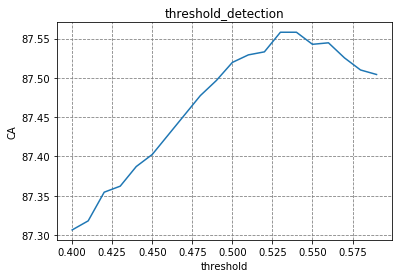

In [35]:
x = np.arange(bottom, top, 1.0/split_num)
plt.plot(x, accuracies)
plt.title('threshold_detection')
plt.ylabel('CA')
plt.xlabel('threshold')
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [ ]:
accuracy, errors = data.test_accuracy(ensemble_predictions, data.x_test, data.x_other_features_test, data.y_test, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary, threshold=0.1)
print(accuracy)

In [19]:
ensemble_predictions[0][0]

1.6609331e-10

In [32]:
errors = [[el[0], el[1][::-1], el[2], el[3][::-1], el[4][::-1]] for el in errors]
errors.sort(key=lambda x: x[1])

output = open('error_analysis_results/onedirectional_input/ensemble_errors.pkl', 'wb')
pickle.dump(errors, output)
output.close()
output = open('error_analysis_results/onedirectional_input/ensemble_predictions.pkl', 'wb')
pickle.dump(ensemble_predictions, output)
output.close()

In [84]:
len(predictions)

52058

In [19]:
def compare_outputs(outputs1, outputs2):
    outputs2_indices = [el[0] for el in outputs2]
    return [el for el in outputs1 if el[0] in outputs2_indices]

def get_unique_errors(outputs1, outputs2):
    outputs2_indices = [el[0] for el in outputs2]
    return [el for el in outputs1 if el[0] not in outputs2_indices]

print(len(letters_word_accetuation))
print(len(syllables_word_accetuation))
print(len(syllabled_letters_word_accetuation))
print(len(compare_outputs(letters_word_accetuation, syllables_word_accetuation)))
print(len(compare_outputs(letters_word_accetuation, syllabled_letters_word_accetuation)))
print(len(compare_outputs(syllables_word_accetuation, syllabled_letters_word_accetuation)))


print(1  - 7073.0/52058)
collective_errors = compare_outputs(letters_word_accetuation, compare_outputs(syllabled_letters_word_accetuation, syllables_word_accetuation))
print(len(collective_errors))

# print(letters_word_accetuation[:20])
# print(syllables_word_accetuation[:20])
# print(syllabled_letters_word_accetuation[:20])
# print(collective_errors)

# unique_err = get_unique_errors(get_unique_errors(letters_word_accetuation, syllables_word_accetuation), syllabled_letters_word_accetuation)
# unique_err = get_unique_errors(get_unique_errors(syllables_word_accetuation, letters_word_accetuation), syllabled_letters_word_accetuation)
unique_err = get_unique_errors(get_unique_errors(syllabled_letters_word_accetuation, letters_word_accetuation), syllables_word_accetuation)
print("UNIQUE ERRORS")
print(len(unique_err))

6214
7770
6515
3232
3662
3868
0.8641323139575089
2609
UNIQUE ERRORS
1594


In [100]:
print(letters_word_accetuation_predictions[0])
print(syllables_word_accetuation_predictions[0])
print(syllabled_letters_word_accetuation_predictions[0])

test = np.mean( np.array([ letters_word_accetuation_predictions, syllables_word_accetuation_predictions, syllabled_letters_word_accetuation_predictions ]), axis=0 )
print(test[0])
print((9.99999106e-01 + 9.99989212e-01 + 1.00000000e+00)/3)

[  1.84468085e-08   9.99999106e-01   2.88171825e-17   7.48493946e-24
   4.87220418e-36   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  3.23229117e-11   9.99989212e-01   2.31212027e-08   2.49620165e-26
   3.08989440e-20   4.69045294e-21   4.73113282e-38   1.19897549e-33
   8.32371040e-34   0.00000000e+00]
[  4.11718755e-27   1.00000000e+00   2.89068776e-27   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  6.15971052e-09   9.99996126e-01   7.70706787e-09   2.50330040e-24
   1.02996483e-20   1.56348435e-21   1.57704427e-38   3.99658482e-34
   2.77457006e-34   0.00000000e+00]
0.9999961059999999


In [12]:
ensemble_predictions = np.mean( np.array([ letters_word_accetuation_predictions, syllables_word_accetuation_predictions, syllabled_letters_word_accetuation_predictions ]), axis=0 )
accuracy, errors = data.test_accuracy(ensemble_predictions, data.x_test, data.x_other_features_test, data.y_test, dictionary, feature_dictionary, vowels, syllable_dictionary=syllable_dictionary)
print(accuracy)

91.7054055092397


In [55]:
output = open('ensemble_errors.pkl', 'wb')
pickle.dump(errors, output)
output.close()
output = open('ensemble_predictions.pkl', 'wb')
pickle.dump(predictions, output)
output.close()

In [54]:
accuracy

91.7054055092397

In [16]:
len(ensemble_predictions)

54222

In [21]:
1 - len(errors)/float(data.x_validate.shape[0])

0.9020692707756999

In [81]:
print(len(letters_word_accetuation))
letters_word_accetuation
collective_errors[:1000]
#unique_err[:1000]

5145


[[39151, 'angelček', 'Ncmsn-', 'angélček', 'ángelček'],
 [23994, 'angelčka', 'Ncmsay', 'angélčka', 'ángelčka'],
 [51473, 'angelčka', 'Ncmdn-', 'angélčka', 'ángelčka'],
 [51722, 'angelčka', 'Ncmda-', 'angélčka', 'ángelčka'],
 [39441, 'angelčke', 'Ncmpa-', 'angélčke', 'ángelčke'],
 [13007, 'angelčki', 'Ncmpi-', 'angélčki', 'ángelčki'],
 [26666, 'angelčki', 'Ncmpn-', 'angélčki', 'ángelčki'],
 [12105, 'angelčkih', 'Ncmpl-', 'angélčkih', 'ángelčkih'],
 [38386, 'angelčkih', 'Ncmdl-', 'angélčkih', 'ángelčkih'],
 [47668, 'angelčkom', 'Ncmsi-', 'angélčkom', 'ángelčkom'],
 [50929, 'angelčkom', 'Ncmpd-', 'angélčkom', 'ángelčkom'],
 [31075, 'angelčkoma', 'Ncmdd-', 'angélčkoma', 'ángelčkoma'],
 [44215, 'angelčkoma', 'Ncmdi-', 'angélčkoma', 'ángelčkoma'],
 [17076, 'angelčkov', 'Ncmdg-', 'angélčkov', 'ángelčkov'],
 [45804, 'angelčkov', 'Ncmpg-', 'angélčkov', 'ángelčkov'],
 [6155, 'angelčku', 'Ncmsd-', 'angélčku', 'ángelčku'],
 [30432, 'angelčku', 'Ncmsl-', 'angélčku', 'ángelčku'],
 [46442, 'antisemit

In [22]:
pickle_input = open('ensemble_test_predictions.pkl', 'rb')
ensemble_predictions = pickle.load(pickle_input)

print(len(ensemble_predictions))
print(ensemble_predictions[0])
print(len(data.y_validate))

54222
[  6.65830739e-04   9.97509003e-01   4.23445408e-06   1.21018451e-09
   2.96133344e-12   2.41166559e-17   5.49080865e-25   1.48047591e-26
   4.22223253e-23   4.62659920e-33]
54222


In [57]:
probabilities = np.zeros((10, 10))
count_results = np.zeros(10)
for i in range(len(ensemble_predictions)):
    for j in range(10):
        if data.y_test[i][j] == 1.0:
            probabilities[j] += ensemble_predictions[i]
            count_results[j] += 1
            
for i in range(len(probabilities)):
    probabilities[i] = probabilities[i] / count_results[i]

In [58]:
print(np.around(probabilities, decimals=2))
print(count_results.astype(int))

[[ 0.85  0.15  0.01  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.01  0.94  0.06  0.02  0.01  0.    0.    0.    0.    0.  ]
 [ 0.    0.08  0.9   0.04  0.05  0.03  0.    0.    0.    0.  ]
 [ 0.    0.19  0.12  0.82  0.    0.1   0.05  0.01  0.    0.  ]
 [ 0.    0.07  0.69  0.1   0.88  0.05  0.04  0.05  0.    0.  ]
 [ 0.    0.11  0.43  0.43  0.14  0.92  0.03  0.01  0.01  0.  ]
 [ 0.    0.    0.13  0.68  0.17  0.17  0.91  0.05  0.    0.  ]
 [ 0.    0.    0.    0.1   0.84  0.06  0.    1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.18  0.82  0.    0.    1.    0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]]
[ 2109 26455 20023  4316  1731  1183   377    93    17     0]


In [46]:
print(data.x_test[0])
print(get_word_length(data.x_test[0]))

[1359  834    0    0    0    0    0    0    0    0]
2


In [79]:
int_max = 0

def get_word_length(x):
    i = 0
    for el in x:
        if el == 0:
            return i
        i += 1

probabilities = np.zeros((10, 10))
count_results = np.zeros(10)
for i in range(len(ensemble_predictions)):
    word_len = get_word_length(data.x_test[i])
    #print(word_len)
    #if word_len > 6:
    #    print(word_len)
    #    print(data.y_test[i])
    
    #
    for j in range(word_len):
        #print(word_len)
        if data.y_test[i][word_len - 1 - j] == 1.0:
            for k in range(word_len):
                probabilities[j][k] += ensemble_predictions[i][word_len - 1 - k]
            #probabilities[j] += ensemble_predictions[i]
            count_results[j] += 1
    
#print(probabilities)
for i in range(len(probabilities)):
    for j in range(len(probabilities[i])):
        probabilities[i][j] = probabilities[i][j] / count_results[i]
    
    #probabilities[i] = probabilities[i] / count_results[i]

In [63]:
int_max

9

In [80]:
print(np.around(probabilities, decimals=2))
print(count_results.astype(int))

[[ 0.87  0.14  0.16  0.06  0.01  0.    0.    0.    0.    0.  ]
 [ 0.07  0.92  0.03  0.01  0.    0.    0.    0.    0.    0.  ]
 [ 0.15  0.06  0.93  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.22  0.06  0.07  0.93  0.    0.    0.    0.    0.    0.  ]
 [ 0.26  0.13  0.    0.04  0.96  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.    0.    0.    0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]]
[14812 22918 12964  4939   637    34     0     0     0     0]


In [ ]:
#######################################################################################
# COLLECTIVE RESULTS
#######################################################################################

In [7]:
# TEST DATA!!!
#pickle_input = open('../accent_classification/letters_accent_classification_test_predictions.pkl', 'rb')
#letters_accent_classification_predictions = pickle.load(pickle_input)
#pickle_input = open('../accent_classification/syllables_accent_classification_test_predictions.pkl', 'rb')
#syllables_accent_classification_predictions = pickle.load(pickle_input)
#pickle_input = open('../accent_classification/syllabled_letters_accent_classification_test_predictions.pkl', 'rb')
#syllabled_letters_accent_classification_predictions = pickle.load(pickle_input)
#pickle_input = open('../accent_classification/ensemble_test_predictions.pkl', 'rb')
#ensemble_accent_classification_predictions = pickle.load(pickle_input)

pickle_input = open('../accent_classification/letters_accent_classification_test_errors.pkl', 'rb')
letters_accent_classification_errors = pickle.load(pickle_input)
pickle_input = open('../accent_classification/syllables_accent_classification_test_errors.pkl', 'rb')
syllables_accent_classification_errors = pickle.load(pickle_input)
pickle_input = open('../accent_classification/syllabled_letters_accent_classification_test_errors.pkl', 'rb')
syllabled_letters_accent_classification_errors = pickle.load(pickle_input)

pickle_input = open('../accent_classification/error_analysis_results/onedirectional_input/letters_accent_classification_correct_order_reversed_error.pkl', 'rb')
letters_accent_classification_correct_order_errors = pickle.load(pickle_input)
pickle_input = open('../accent_classification/error_analysis_results/onedirectional_input/syllables_accent_classification_correct_order_reversed_error.pkl', 'rb')
syllables_accent_classification_correct_order_errors = pickle.load(pickle_input)
pickle_input = open('../accent_classification/error_analysis_results/onedirectional_input/syllabled_letters_accent_classification_correct_order_reversed_error.pkl', 'rb')
syllabled_letters_accent_classification_correct_order_errors = pickle.load(pickle_input)


pickle_input = open('../accent_classification/error_analysis_results/onedirectional_input/ensemble_errors.pkl', 'rb')
ensemble_accent_classification_errors = pickle.load(pickle_input)

In [33]:
# TEST DATA
pickle_input = open('letters_word_accetuation_test_error.pkl', 'rb')
letters_word_accetuation = pickle.load(pickle_input)
pickle_input = open('syllables_word_accetuation_test_error.pkl', 'rb')
syllables_word_accetuation = pickle.load(pickle_input)
pickle_input = open('syllabled_letters_word_accetuation_test_error.pkl', 'rb')
syllabled_letters_word_accetuation = pickle.load(pickle_input)
pickle_input = open('error_analysis_results/onedirectional_input/ensemble_errors.pkl', 'rb')
ensemble_word_accetuation = pickle.load(pickle_input)

pickle_input = open('letters_word_accetuation_test_predictions.pkl', 'rb')
letters_word_accetuation_predictions = pickle.load(pickle_input)
pickle_input = open('syllables_word_accetuation_test_predictions.pkl', 'rb')
syllables_word_accetuation_predictions = pickle.load(pickle_input)
pickle_input = open('syllabled_letters_word_accetuation_test_predictions.pkl', 'rb')
syllabled_letters_word_accetuation_predictions = pickle.load(pickle_input)
pickle_input = open('ensemble_test_predictions.pkl', 'rb')
ensemble_word_accetuation_predictions = pickle.load(pickle_input)

In [10]:
1 - len(ensemble_accent_classification_errors)/float(data.x_validate.shape[0])

0.9647006750027665

In [34]:
def compare_outputs(outputs1, outputs2):
    outputs2_indices = [el[0] for el in outputs2]
    return [el for el in outputs1 if el[0] in outputs2_indices]

def prediction_accuracy(stress_location_errors, stress_type_errors, length):
    print(1 - len(stress_location_errors)/float(length))
    print(1 - len(stress_type_errors)/float(length))
    collective_error_num = len(stress_location_errors) + len(stress_type_errors) -\
                            len(compare_outputs(stress_location_errors, stress_type_errors))
    print(1 - collective_error_num/float(length))
#print(len(letters_accent_classification_errors))
#print(len(letters_word_accetuation_test))
#len(compare_outputs(letters_accent_classification_errors, letters_word_accetuation_test))
print("letters")
prediction_accuracy(letters_word_accetuation, letters_accent_classification_errors, data.x_validate.shape[0])

print("syllables")
prediction_accuracy(syllables_word_accetuation, syllables_accent_classification_errors, data.x_validate.shape[0])

print("syllabled letters")
prediction_accuracy(syllabled_letters_word_accetuation, syllabled_letters_accent_classification_errors, data.x_validate.shape[0])

print("ensembles")
prediction_accuracy(ensemble_word_accetuation, ensemble_accent_classification_errors, data.x_validate.shape[0])

letters
0.8853970712994725
0.9606248386263878
0.8564789199955738
syllables
0.8567002323780015
0.9399690162664601
0.8153701449596105
syllabled letters
0.879845819040242
0.9598318025893549
0.8502268451919885
ensembles
0.9129320202131976
0.9647006750027665
0.8872966692486445
